In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file = "/Users/brewaterman/Desktop/USGS Files/gwlevels706.txt"
df = pd.read_csv(file, sep='\t', comment='#')
wellData = df.drop(0)
wellData.head(5)

,agency_cd,site_no,site_tp_cd,lev_dt,lev_tm,lev_tz_cd,lev_va,sl_lev_va,sl_datum_cd,lev_status_cd,lev_agency_cd,lev_dt_acy_cd,lev_acy_cd,lev_src_cd,lev_meth_cd,lev_age_cd
1,USGS,390828096454706,GW,2005-11-16,13:20,CST,NaN,1144.68,NGVD29,NaN,USGS,m,2,S,T,A
2,USGS,390828096454706,GW,2006-03-15,11:10,CST,NaN,1144.31,NGVD29,NaN,USGS,m,2,S,T,A
3,USGS,390828096454706,GW,2006-07-05,10:15,CDT,NaN,1143.99,NGVD29,NaN,USGS,m,2,S,T,A
4,USGS,390828096454706,GW,2006-10-16,10:30,CDT,NaN,1143.27,NGVD29,NaN,USGS,m,2,S,T,A
5,USGS,390828096454706,GW,2006-12-21,10:15,CST,NaN,1143.37,NGVD29,NaN,USGS,m,2,S,T,A


In [3]:
wellData = wellData.astype({"sl_lev_va" : float})

level_date = pd.to_datetime(wellData["lev_dt"])

#only need years
level_date = level_date.dt.year    

In [4]:
wellData.insert(4, "Years", level_date)
wellData.head(2)

,agency_cd,site_no,site_tp_cd,lev_dt,Years,lev_tm,lev_tz_cd,lev_va,sl_lev_va,sl_datum_cd,lev_status_cd,lev_agency_cd,lev_dt_acy_cd,lev_acy_cd,lev_src_cd,lev_meth_cd,lev_age_cd
1,USGS,390828096454706,GW,2005-11-16,2005,13:20,CST,NaN,1144.68,NGVD29,NaN,USGS,m,2,S,T,A
2,USGS,390828096454706,GW,2006-03-15,2006,11:10,CST,NaN,1144.31,NGVD29,NaN,USGS,m,2,S,T,A


In [5]:
file2 = "/Users/brewaterman/Desktop/USGS Files/Riley2"
df2 = pd.read_csv(file2, sep = "\t", comment = "#")
wellInfo = df2.drop(0)
wellInfo.head(2)

,agency_cd,site_no,station_nm,site_tp_cd,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,coord_datum_cd,dec_coord_datum_cd,...,alt_meth_cd,alt_acy_va,alt_datum_cd,huc_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd
1,USGS,390828096454706,RILEY OB97-07 10S 06E 33ACAC06,GW,39.14117220,-96.76303610,R,1,NAD83,NAD83,...,R,0.1,NGVD29,10270101,NaN,NaN,NaN,30.00,30.00,D


In [6]:
wellInfo = wellInfo.astype({"alt_va": float})

In [7]:
dftotal = pd.merge(wellData, wellInfo, on="site_no", how='outer')
dftotal.head(2)

,agency_cd_x,site_no,site_tp_cd_x,lev_dt,Years,lev_tm,lev_tz_cd,lev_va,sl_lev_va,sl_datum_cd,...,alt_meth_cd,alt_acy_va,alt_datum_cd,huc_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd
0,USGS,390828096454706,GW,2005-11-16,2005,13:20,CST,NaN,1144.68,NGVD29,...,R,0.1,NGVD29,10270101,NaN,NaN,NaN,30.00,30.00,D
1,USGS,390828096454706,GW,2006-03-15,2006,11:10,CST,NaN,1144.31,NGVD29,...,R,0.1,NGVD29,10270101,NaN,NaN,NaN,30.00,30.00,D


In [8]:
depthfromSurface = (dftotal.alt_va - dftotal.sl_lev_va)
dftotal.insert(9, "depth_va_from_surface", -depthfromSurface)  #adding that value into df
dftotal.head(5)

,agency_cd_x,site_no,site_tp_cd_x,lev_dt,Years,lev_tm,lev_tz_cd,lev_va,sl_lev_va,depth_va_from_surface,...,alt_meth_cd,alt_acy_va,alt_datum_cd,huc_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd
0,USGS,390828096454706,GW,2005-11-16,2005,13:20,CST,NaN,1144.68,-14.04,...,R,0.1,NGVD29,10270101,NaN,NaN,NaN,30.00,30.00,D
1,USGS,390828096454706,GW,2006-03-15,2006,11:10,CST,NaN,1144.31,-14.41,...,R,0.1,NGVD29,10270101,NaN,NaN,NaN,30.00,30.00,D
2,USGS,390828096454706,GW,2006-07-05,2006,10:15,CDT,NaN,1143.99,-14.73,...,R,0.1,NGVD29,10270101,NaN,NaN,NaN,30.00,30.00,D
3,USGS,390828096454706,GW,2006-10-16,2006,10:30,CDT,NaN,1143.27,-15.45,...,R,0.1,NGVD29,10270101,NaN,NaN,NaN,30.00,30.00,D
4,USGS,390828096454706,GW,2006-12-21,2006,10:15,CST,NaN,1143.37,-15.35,...,R,0.1,NGVD29,10270101,NaN,NaN,NaN,30.00,30.00,D


In [9]:
df_years = dftotal.groupby('Years', as_index=False).mean()
df_years

,Years,sl_lev_va,depth_va_from_surface,alt_va
0,2005,1144.680000,-14.040000,1158.72
1,2006,1143.735000,-14.985000,1158.72
2,2007,1145.932000,-12.788000,1158.72
3,2008,1149.846667,-8.873333,1158.72
4,2009,1147.458571,-11.261429,1158.72
5,2010,1149.157500,-9.562500,1158.72
6,2011,1144.973333,-13.746667,1158.72
7,2012,1146.052000,-12.668000,1158.72
8,2013,1144.016000,-14.704000,1158.72
9,2014,1144.445000,-14.275000,1158.72


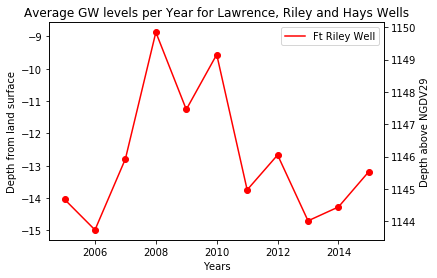

In [27]:
plt.figure()
ax1 = plt.subplot()
ax1.plot(df_years['Years'][0:11],df_years['depth_va_from_surface'][0:11], 'ro', label ="Ft Riley Well")

ax2 = ax1.twinx() #so they share
ax2.plot(df_years['Years'][0:11],df_years['sl_lev_va'][0:11], '-r', label ="Ft Riley Well")

plt.legend()
plt.legend(loc='best')
ax1.set_xlabel("Years")
ax1.set_ylabel("Depth from land surface")
ax2.set_ylabel("Depth above NGDV29")

plt.title("Average GW levels per Year for Lawrence, Riley and Hays Wells")
plt.savefig('riley.png')
plt.show()

In [11]:
file = "/Users/brewaterman/Desktop/USGS Files/gwlevelst17.txt"
df = pd.read_csv(file, sep='\t', comment='#')
wellData = df.drop(0)
wellData.head(5)

,agency_cd,site_no,site_tp_cd,lev_dt,lev_tm,lev_tz_cd,lev_va,sl_lev_va,sl_datum_cd,lev_status_cd,lev_agency_cd,lev_dt_acy_cd,lev_acy_cd,lev_src_cd,lev_meth_cd,lev_age_cd
1,USGS,384253099180701,GW,2004-08-17,09:15,CDT,NaN,1887.82,NGVD29,NaN,USGS,m,2,S,S,A
2,USGS,384253099180701,GW,2004-08-18,09:50,CDT,NaN,1890.23,NGVD29,NaN,USGS,m,2,S,S,A
3,USGS,384253099180701,GW,2004-08-19,11:25,CDT,NaN,1889.85,NGVD29,NaN,USGS,m,2,S,S,A
4,USGS,384253099180701,GW,2004-10-13,10:15,CDT,NaN,1889.82,NGVD29,NaN,USGS,m,2,S,S,A
5,USGS,384253099180701,GW,2004-11-18,13:05,CST,NaN,1889.78,NGVD29,NaN,USGS,m,2,S,S,A


In [12]:
wellData = wellData.astype({"sl_lev_va" : float})

level_date = pd.to_datetime(wellData["lev_dt"])

#only need years
level_date = level_date.dt.year 

wellData.insert(4, "Years", level_date)
wellData.head(2)

,agency_cd,site_no,site_tp_cd,lev_dt,Years,lev_tm,lev_tz_cd,lev_va,sl_lev_va,sl_datum_cd,lev_status_cd,lev_agency_cd,lev_dt_acy_cd,lev_acy_cd,lev_src_cd,lev_meth_cd,lev_age_cd
1,USGS,384253099180701,GW,2004-08-17,2004,09:15,CDT,NaN,1887.82,NGVD29,NaN,USGS,m,2,S,S,A
2,USGS,384253099180701,GW,2004-08-18,2004,09:50,CDT,NaN,1890.23,NGVD29,NaN,USGS,m,2,S,S,A


In [13]:
file2 = "/Users/brewaterman/Desktop/USGS Files/hayst17"
df2 = pd.read_csv(file2, sep = "\t", comment = "#")
wellInfo = df2.drop(0)
wellInfo.head(2)

,agency_cd,site_no,station_nm,site_tp_cd,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,coord_datum_cd,dec_coord_datum_cd,...,alt_meth_cd,alt_acy_va,alt_datum_cd,huc_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd
1,USGS,384253099180701,15S 18W 27DDA 01 SCHOENCHEN WELL T-17,GW,38.71473475,-99.30232530,G,S,NAD27,NAD83,...,G,.1,NGVD29,10260006,N100ALLUVL,211SMKH,NaN,49.00,NaN,NaN


In [14]:
wellInfo = wellInfo.astype({"alt_va": float})
dftotal = pd.merge(wellData, wellInfo, on="site_no", how='outer')
dftotal.head(2)

,agency_cd_x,site_no,site_tp_cd_x,lev_dt,Years,lev_tm,lev_tz_cd,lev_va,sl_lev_va,sl_datum_cd,...,alt_meth_cd,alt_acy_va,alt_datum_cd,huc_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd
0,USGS,384253099180701,GW,2004-08-17,2004,09:15,CDT,NaN,1887.82,NGVD29,...,G,.1,NGVD29,10260006,N100ALLUVL,211SMKH,NaN,49.00,NaN,NaN
1,USGS,384253099180701,GW,2004-08-18,2004,09:50,CDT,NaN,1890.23,NGVD29,...,G,.1,NGVD29,10260006,N100ALLUVL,211SMKH,NaN,49.00,NaN,NaN


In [15]:
depthfromSurface = (dftotal.alt_va - dftotal.sl_lev_va)
dftotal.insert(9, "depth_va_from_surface", -depthfromSurface)  #adding that value into df
dftotal.head(5)

,agency_cd_x,site_no,site_tp_cd_x,lev_dt,Years,lev_tm,lev_tz_cd,lev_va,sl_lev_va,depth_va_from_surface,...,alt_meth_cd,alt_acy_va,alt_datum_cd,huc_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd
0,USGS,384253099180701,GW,2004-08-17,2004,09:15,CDT,NaN,1887.82,-14.05,...,G,.1,NGVD29,10260006,N100ALLUVL,211SMKH,NaN,49.00,NaN,NaN
1,USGS,384253099180701,GW,2004-08-18,2004,09:50,CDT,NaN,1890.23,-11.64,...,G,.1,NGVD29,10260006,N100ALLUVL,211SMKH,NaN,49.00,NaN,NaN
2,USGS,384253099180701,GW,2004-08-19,2004,11:25,CDT,NaN,1889.85,-12.02,...,G,.1,NGVD29,10260006,N100ALLUVL,211SMKH,NaN,49.00,NaN,NaN
3,USGS,384253099180701,GW,2004-10-13,2004,10:15,CDT,NaN,1889.82,-12.05,...,G,.1,NGVD29,10260006,N100ALLUVL,211SMKH,NaN,49.00,NaN,NaN
4,USGS,384253099180701,GW,2004-11-18,2004,13:05,CST,NaN,1889.78,-12.09,...,G,.1,NGVD29,10260006,N100ALLUVL,211SMKH,NaN,49.00,NaN,NaN


In [16]:
df_years2 = dftotal.groupby('Years', as_index=False).mean()
df_years2

,Years,sl_lev_va,depth_va_from_surface,alt_va
0,2004,1889.578333,-12.291667,1901.87
1,2005,1889.493846,-12.376154,1901.87
2,2006,1889.867500,-12.002500,1901.87
3,2007,1890.852000,-11.018000,1901.87
4,2008,1888.838333,-13.031667,1901.87
5,2009,1890.553333,-11.316667,1901.87
6,2010,1890.824286,-11.045714,1901.87
7,2011,1889.960000,-11.910000,1901.87
8,2012,1886.855000,-15.015000,1901.87
9,2013,1887.123750,-14.746250,1901.87


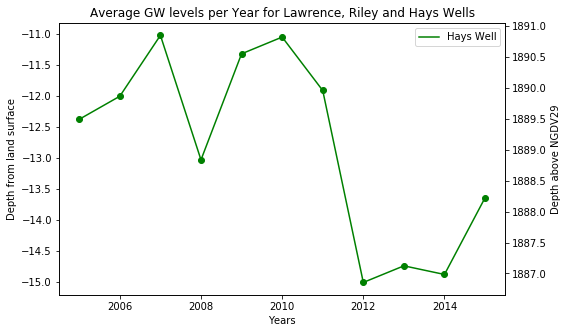

In [31]:
plt.figure(figsize =(8,5))
ax1 = plt.subplot()
ax1.plot(df_years2['Years'][1:12],df_years2['depth_va_from_surface'][1:12], 'go', label ="Hays Well")

ax2 = ax1.twinx() #so they share
ax2.plot(df_years2['Years'][1:12],df_years2['sl_lev_va'][1:12], '-g', label ="Hays Well")

plt.legend()
plt.legend(loc='best')
ax1.set_xlabel("Years")
ax1.set_ylabel("Depth from land surface")
ax2.set_ylabel("Depth above NGDV29")

plt.title("Average GW levels per Year for Lawrence, Riley and Hays Wells")
plt.savefig('fthayst17.png')
plt.show()